# Declaration of Originality

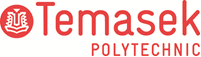

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Coen Ng Zhexian (2400400D)
* Tutorial Group                :  P04
* Tutor						    :  Mr Emilie Sebastian
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [3]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'Singapore Public Housing Resale Flat Prices from 2017 to 2023.csv'
df = pd.read_csv(FILE_PATH)
df

,month,town,public_housing_flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_Singapore_dollars
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
155816,2023-06,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,93 years 03 months,645000.0
155817,2023-06,YISHUN,5 ROOM,513A,YISHUN ST 51,07 TO 09,120.0,3Gen,2018,93 years 09 months,685000.0
155818,2023-06,YISHUN,5 ROOM,613,YISHUN ST 61,01 TO 03,121.0,Improved,1987,62 years 11 months,565000.0
155819,2023-06,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,143.0,Apartment,1987,63 years 04 months,845000.0


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   month                           155821 non-null  object 
 1   town                            155821 non-null  object 
 2   public_housing_flat_type        155821 non-null  object 
 3   block                           155821 non-null  object 
 4   street_name                     155821 non-null  object 
 5   storey_range                    155821 non-null  object 
 6   floor_area_sqm                  155821 non-null  float64
 7   flat_model                      155821 non-null  object 
 8   lease_commence_date             155821 non-null  int64  
 9   remaining_lease                 155821 non-null  object 
 10  resale_price_Singapore_dollars  155821 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.1+ MB


In [5]:
## Check for missing data
df.isna().sum()

month                             0
town                              0
public_housing_flat_type          0
block                             0
street_name                       0
storey_range                      0
floor_area_sqm                    0
flat_model                        0
lease_commence_date               0
remaining_lease                   0
resale_price_Singapore_dollars    0
dtype: int64

In [6]:
## Describe data distribution
df.describe(include="all")

,month,town,public_housing_flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price_Singapore_dollars
count,155821,155821,155821,155821,155821,155821,155821.000000,155821,155821.000000,155821,1.558210e+05
unique,78,26,7,2664,564,17,NaN,21,NaN,664,NaN
top,2021-08,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 10 months,NaN
freq,2739,13099,65377,489,2295,35878,NaN,52879,NaN,1436,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.477862,NaN,1995.668087,NaN,4.835541e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.046407,NaN,13.823952,NaN,1.671764e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1985.000000,NaN,3.600000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,NaN,1996.000000,NaN,4.515000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2008.000000,NaN,5.750000e+05


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

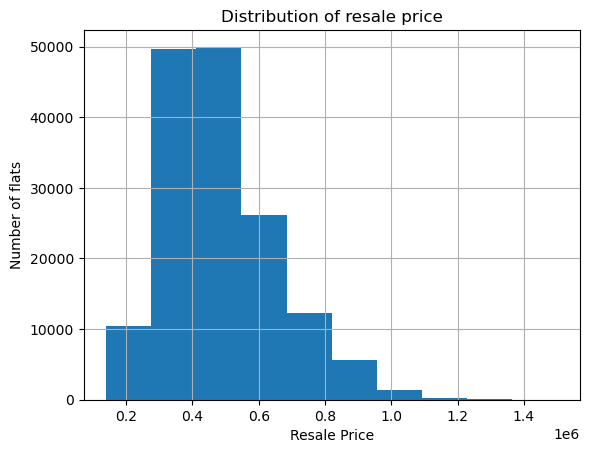

In [7]:
## Understanding distribution of target
col_y = 'resale_price_Singapore_dollars'

##Plot histogram
df[col_y].hist()
plt.title(f"Distribution of resale price")
plt.suptitle('')
plt.xlabel('Resale Price')
plt.ylabel('Number of flats')
plt.show()

The number of flats are mostly sold at the resale price of around 0.3 - 0.5 million.

### 2.3.1.2 Understanding distribution of features

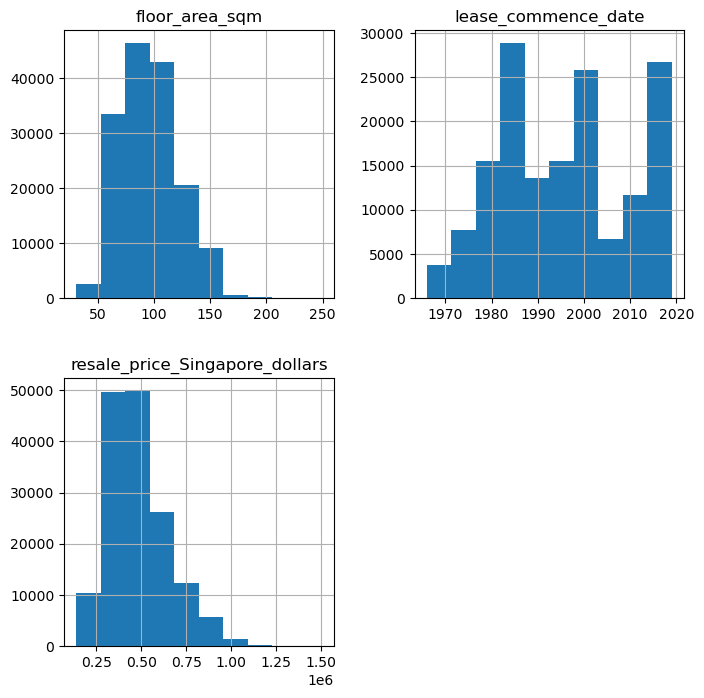

In [8]:
## Understanding distribution of features
df.hist(figsize=(8,8))
plt.show()



More flats with a larger floor area are being resold, most notably between 50s square metres to about 125 square metres.
There are 3 significant periods where the number of resale units were above 25000. Those periods were between 1980-1990, about 1995-2005, and around 2015 to before 2020.


<Axes: >

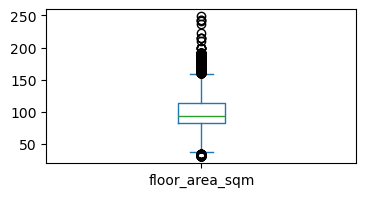

In [9]:
## Boxplot
df['floor_area_sqm'].plot(kind='box', figsize=(4,2))

The boxplot reveals that there are outliers beyond the whiskers, notably above 200 sqm and below 50 sqm. This would affect the model's predictions when predicting the resale price by floor area.

<Axes: >

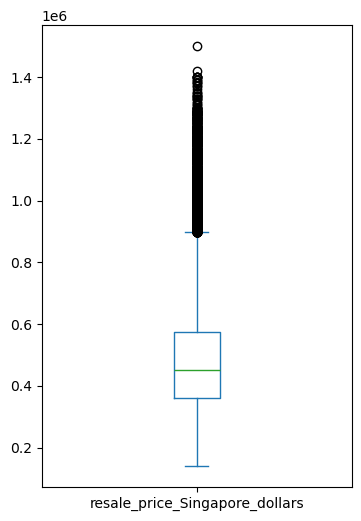

In [10]:
df['resale_price_Singapore_dollars'].plot(kind='box', figsize=(4,6))

The boxplot indicates the presence of several outliers, along with a single extreme value exceeding 1.5 million in resale price. As resale price is the target variable, such extreme values may influence prediction accuracy and would be taken into consideration durning model evaluation.

### 2.3.2 Understanding relationship between variables

<Axes: >

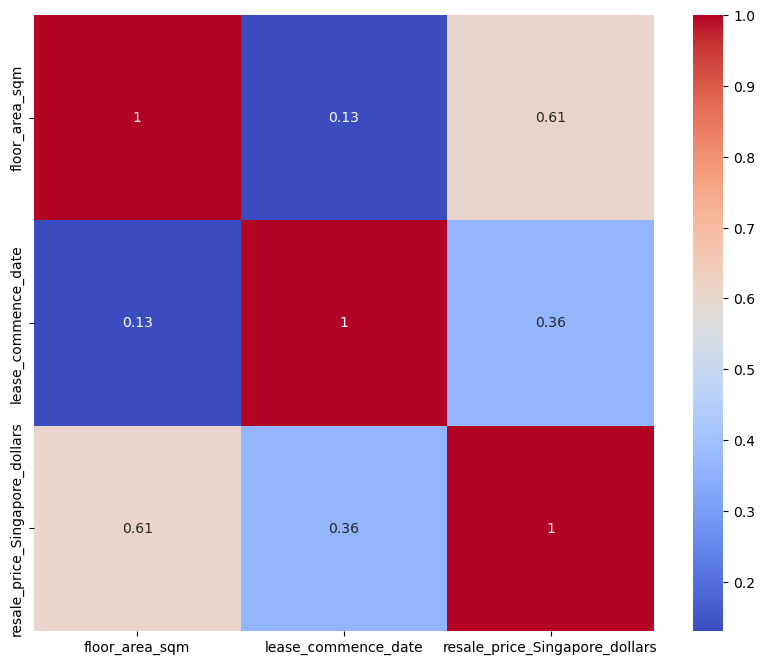

In [11]:
## Understanding relationship between variables
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

The heatmap indicates a mild correlation between floor area and lease commencement date, suggesting that newer units do not consistently have larger floor areas. This implies that flat size is likely influenced by multiple factors rather than construction period alone. This implies that the flat size is not directly influenced by the lease commencement date. The resale price has a strong positive relationship with the floor_area_sqm, which suggests that the floor area does affect the resale price. This heatmap shows a weak to moderate correlation between the resale price and the lease commencement date. This suggests that the newer flats tend to go for a higher resale price, but it is not a significant factor in determining the resale price.

<Axes: xlabel='resale_price_Singapore_dollars', ylabel='floor_area_sqm'>

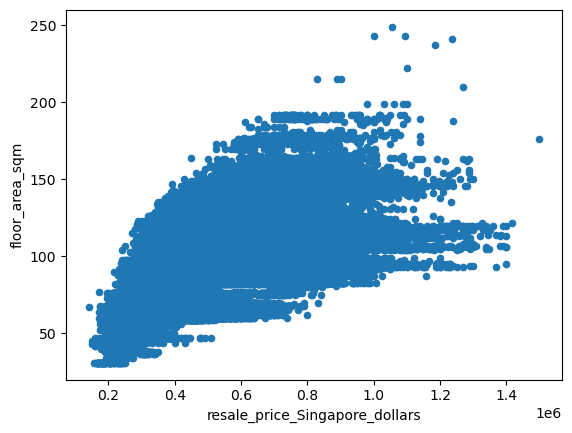

In [12]:
## Scatterplot 
df.plot(x=col_y, y='floor_area_sqm', kind='scatter')

The scatterplot shows that the relationship between the floor area and resale price is positively linear, which means that the resale price increases based on the floor area.

# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
## Clean data
df = df.drop(columns= ['month', 'storey_range', 'street_name', 'block', 'flat_model'], axis =1)

## dropping these columns as they are not useful in predicting resale price

df['remaining_lease'] = (
    df['remaining_lease'].str.extract(r'(\d+)').astype(int)
)
## Converting remaining_lease to integer type

df.head()



,town,public_housing_flat_type,floor_area_sqm,lease_commence_date,remaining_lease,resale_price_Singapore_dollars
0,ANG MO KIO,2 ROOM,44.0,1979,61,232000.0
1,ANG MO KIO,3 ROOM,67.0,1978,60,250000.0
2,ANG MO KIO,3 ROOM,67.0,1980,62,262000.0
3,ANG MO KIO,3 ROOM,68.0,1980,62,265000.0
4,ANG MO KIO,3 ROOM,67.0,1980,62,265000.0


In [14]:
## One-hot encoding categorical variables

df = pd.get_dummies(df, columns=['public_housing_flat_type', 'town'], drop_first=True)

df.shape

(155821, 35)

In [15]:
## Check data frame after cleaning

df.head()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price_Singapore_dollars,public_housing_flat_type_2 ROOM,public_housing_flat_type_3 ROOM,public_housing_flat_type_4 ROOM,public_housing_flat_type_5 ROOM,public_housing_flat_type_EXECUTIVE,public_housing_flat_type_MULTI-GENERATION,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,44.0,1979,61,232000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1978,60,250000.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,1980,62,262000.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,1980,62,265000.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67.0,1980,62,265000.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.2 Train-Test Split

In [16]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

## Defining target variable and feature variable
col_y = 'resale_price_Singapore_dollars'
X = df.drop(columns=[col_y], axis=1)
y = df[col_y]

## Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=2025)

# 4. Modelling

### 4.2 Train Model

In [17]:
## Initialise and train model
##Linear Regression
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)

## Decision tree
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2025)
dtr.fit(X_train, y_train)

## Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=2025)
rf.fit(X_train, y_train)

##Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=2025)
gbr.fit(X_train, y_train)

## Since this is a model used to predict the price of resale flats, Regression models are used. Multiple models are used to compare
## performance and to select the best model for deployment.

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [18]:
## Evaluate model

## Model predictions
## Linear Regression predictions
linr_pred = linr.predict(X_test)

## Decision Tree predictions
dtr_pred = dtr.predict(X_test)

## Random Forest predictions
rf_pred = rf.predict(X_test)

## Gradient Boosting predictions
gbr_pred = gbr.predict(X_test)

In [19]:
## MAE for the models
from sklearn.metrics import mean_absolute_error

print("MAE Scores")

print("Linear Regression:", mean_absolute_error(y_test, linr_pred))
print("Decision Tree:", mean_absolute_error(y_test, dtr_pred))
print("Random Forest:", mean_absolute_error(y_test, rf_pred))
print("Gradient Boosting:", mean_absolute_error(y_test, gbr_pred))

## Since Random Forest had the lowest MAE, it indicates that it deviates the least from the actual prices on average despite having 
## outliers to cause deviation. This suggests that Random Forest is the most consistent model for predicting resale prices.

MAE Scores
Linear Regression: 55781.451220587274
Decision Tree: 31053.28018776186
Random Forest: 29686.84167921119
Gradient Boosting: 57072.03642193862


In [20]:
## MSE for the models
from sklearn.metrics import mean_squared_error

print("MSE Scores")

print("Linear Regression:", mean_squared_error(y_test, linr_pred))
print("Decision Tree:", mean_squared_error(y_test, dtr_pred))
print("Random Forest:", mean_squared_error(y_test, rf_pred))
print("Gradient Boosting:", mean_squared_error(y_test, gbr_pred))

## MSE places a higher penalty on large errors, so it is used to see which model has the least large deviations from actual prices.
## Since Random Forest has the lowest MSE, it indicates that it has the least large deviations from actual prices compared to other models.

MSE Scores
Linear Regression: 5183224286.695024
Decision Tree: 1959823637.4591985
Random Forest: 1718984272.860574
Gradient Boosting: 5580340858.033317


In [21]:
## RMSE for the models

from sklearn.metrics import root_mean_squared_error

print("RMSE Scores")
print("Linear Regression:", root_mean_squared_error(y_test, linr_pred))
print("Decision Tree:", root_mean_squared_error(y_test, dtr_pred))
print("Random Forest:", root_mean_squared_error(y_test, rf_pred))
print("Gradient Boosting:", root_mean_squared_error(y_test, gbr_pred))

## RMSE was used to evaluate model performance as it measures prediction error while placing greater emphasis on larger mistakes. 
## Since Random Forest had the lowest RMSE, it indicates that it is the most accurate model in predicting resale prices.

RMSE Scores
Linear Regression: 71994.61290051516
Decision Tree: 44269.89538568166
Random Forest: 41460.63522017691
Gradient Boosting: 74701.679084431


Overall, multiple evaluation metrics were used to assess model performance, as each captures prediction error from a different perspective. Among the evaluated models, Random Forest Regressor consistently achieved lower MAE, MSE, and RMSE values, indicating stronger predictive accuracy and better control of large errors. Therefore, the Random Forest Regressor model was selected as the final model for housing price prediction.

In [22]:
##Comparing default Random Forest with tuned Random Forest
rf_default = RandomForestRegressor(random_state=2025)
rf_default.fit(X_train, y_train)

pred_default = rf_default.predict(X_test)

rmse_default = np.sqrt(mean_squared_error(y_test, pred_default))

print("Default Random Forest RMSE:", rmse_default)

Default Random Forest RMSE: 41460.63522017691


In [23]:
## Hyperparameter Tuning using Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(100, 250),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 4)
}

rf = RandomForestRegressor(random_state=2025)

rs_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=10, 
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=2025
)

rs_rf.fit(X_train, y_train)

best_model = rs_rf.best_estimator_
print("Best Parameters:", rs_rf.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 201}


In [24]:
## Evaluate tuned model

from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = best_model.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred))

print("Tuned RMSE:", rmse_tuned)

Tuned RMSE: 41124.40041996416


RandomizedSearchCV was chosen to tune the Random Forest model due to the large dataset size of about 155,000 records. Using GridSearch would require testing every parameter combination, resulting in high computational cost with limited additional benefit. Randomized search allows efficient exploration of multiple hyperparameter settings, enabling effective model optimization while keeping training time manageable.

After hyperparameter tuning, the Random Forest model achieved a lower RMSE, decreasing from 41,460 to 41,124. This indicates improved prediction accuracy and better generalization to unseen data.

The relatively small improvement suggests that the baseline model was already performing well, likely due to the large dataset providing sufficient information for the model to learn effectively. However, the tuning process further refined the model by identifying parameters that enhanced prediction stability.

In [25]:
## New data
def create_input(floor_area, lease, lease_year, flat_type, town):
    
    sample = pd.DataFrame(0, index=[0], columns=X_train.columns)

    sample['floor_area_sqm'] = floor_area
    sample['remaining_lease'] = lease
    sample['lease_commence_date'] = lease_year

    sample[f'public_housing_flat_type_{flat_type}'] = 1
    sample[f'town_{town}'] = 1

    return sample

new_sample = create_input(92, 78, 2000, "4 ROOM", "TAMPINES")
## Predict

prediction = best_model.predict(new_sample)
print("Prediction:", prediction)

Prediction: [443378.88253731]


## Iterative model development


In [26]:
## Further feature engineering / feature selection

## did convertion of remaining lease from string to integer type, aside from that, no other feature engineering was done.

In [27]:
## saving model for deployment
import joblib
joblib.dump(best_model, 'hdb_rf_model.pkl')
joblib.dump(X.columns, 'model_columns.pkl')

['model_columns.pkl']